In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# make_classification generates a synthetic classification dataset useful for training/testing
# ML models, especially classifiers
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(
    n_samples=1000,           # Total number of data points (rows)
    n_features=2,             # Total number of features (columns)
    n_classes=2,              # Number of output classes (labels) - 2 for binary classification
    n_clusters_per_class=2,   # Number of clusters per class - more clusters = more complexity
    n_redundant=0             # Number of redundant features - linear combinations of informative ones
    # Other optional parameters:
    # n_informative=2,        # Number of informative features that are useful to determine the class
    # n_repeated=0,           # Number of duplicated features
    # flip_y=0.01,            # Fraction of samples whose class are randomly flipped (adds noise)
    # class_sep=1.0,          # Controls how far apart the class clusters are (higher = easier to separate)
    # weights=None,           # Proportion of samples assigned to each class (e.g., [0.7, 0.3] for imbalance)
    # random_state=None       # Seed for reproducibility
)

In [5]:
X

array([[ 0.41520543, -0.55235572],
       [ 0.2619552 ,  0.65795634],
       [ 0.11591316,  1.65445274],
       ...,
       [ 0.27115412,  0.77949968],
       [ 0.1980585 , -2.10990395],
       [ 1.12564565,  0.87017748]])

In [6]:
y

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [7]:
pd.DataFrame(X)[0]

0      0.415205
1      0.261955
2      0.115913
3     -1.379676
4     -3.436989
         ...   
995   -1.597510
996    0.594684
997    0.271154
998    0.198059
999    1.125646
Name: 0, Length: 1000, dtype: float64

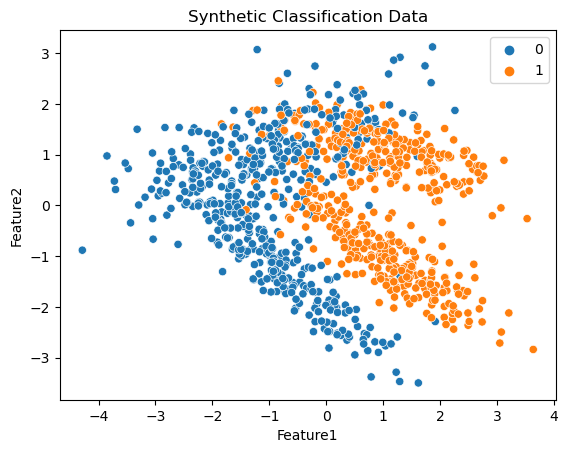

In [10]:
# sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

# Convert X to DataFrame for clarity
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Plot
sns.scatterplot(x='Feature1', y='Feature2', hue=y, data=df)
plt.title("Synthetic Classification Data")
plt.show()

In [12]:
# we can't apply SVC directly as data is distributed randomly

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [14]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

# After fitting an SVC model with a linear kernel, svc.coef_ gives you the weights (coefficients)
# of the hyperplane separating the classes.
svc.coef_

## Prediction
y_pred=svc.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       124
           1       0.86      0.86      0.86       126

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[107  17]
 [ 18 108]]


In [16]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)

## Prediction
y_pred1=rbf.predict(X_test)

print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       124
           1       0.92      0.87      0.89       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[115   9]
 [ 17 109]]


In [18]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)

## Prediction
y_pred2=polynomial.predict(X_test)

print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       124
           1       0.83      0.95      0.89       126

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[ 99  25]
 [  6 120]]


In [19]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)

## Prediction
y_pred3=sigmoid.predict(X_test)

print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       124
           1       0.83      0.76      0.79       126

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250

[[104  20]
 [ 30  96]]


In [25]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    # 'degree': [2, 3],                # only used if kernel='poly'
    # 'coef0': [0.0, 0.5],             # only used for poly/sigmoid
    # 'shrinking': [True, False],
    # 'class_weight': [None, 'balanced']
}

In [27]:
# refit = True : automatically trains a final model on the entire dataset using the best parameters
# Verbose : Controls how much information is printed while GridSearchCV is running.
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [28]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.820 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [30]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       124
           1       0.93      0.88      0.90       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[115   9]
 [ 15 111]]
